# Пример из лабораторной работы №7

In [1]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb_v1/aclImdb/train")

# load_files возвращает коллекцию, содержащую обучающие тексты и обучающие метки
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
reviews_test = load_files("aclImdb_v1/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
# Мы строим модель и преобразуем данные в один этап
# Преобразование займет некоторое время и мы можем сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)

In [6]:
lda.components_.shape

(10, 10000)

In [7]:
# Для каждой темы (строки в components_) сортируем признаки (по возрастанию)
# Инвертируем строки с помощью [:, ::-1], чтобы получить сортировку по убыванию
import numpy as np
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names_out())

In [8]:
import mglearn
# Выводим 10 тем
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          saw           
real          world         guy           series        didn          
performance   book          comedy        episode       am            
young         us            thing         tv            thought       
family        our           actually      episodes      dvd           
both          documentary   worst         shows         years         
director      work          re            season        got           
role          american      nothing       new           again         
actors        history       actors        years         now           
beautiful     point         want          family        watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [9]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [10]:
import numpy as np
topics = np.array([7, 16, 24, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 28      topic 36      topic 37      topic 45      
--------      --------      --------      --------      --------      --------      --------      
horror        didn          hitler        beautiful     performance   japanese      music         
de            worst         german        romantic      role          excellent     songs         
thriller      thing         years         young         play          highly        song          
suspense      boring        nazi          between       actor         performances  rock          
atmosphere    script        young         old           actors        human         band          
mystery       horrible      midnight      feel          cast          culture       soundtrack    
house         re            joe           saw           oscar         actors        singing       
director      wasn          modesty       wonderful     performances  truly         singer        
quite     

In [11]:
# Сортируем документы по весу темы 45 "музыка"
music = np.argsort(document_topics100[:, 45])[::-1]
# Печатаем 10 документов, в которых данная тема является наиболее важной
for i in music[:10]: # выводим первые два предложения 
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"After repeated listenings to the CD soundtrack, I knew I wanted this film, got it for Christmas and I was amazed. Marc Bolan had such charisma, i can't describe it.\n"
b'I love this movie and never get tired of watching. The music in it is great.\n'
b'I love this movie!!! Purple Rain came out the year I was born and it has had my heart since I can remember. Prince is so tight in this movie.\n'
b"The funky, yet strictly second-tier British glam-rock band 

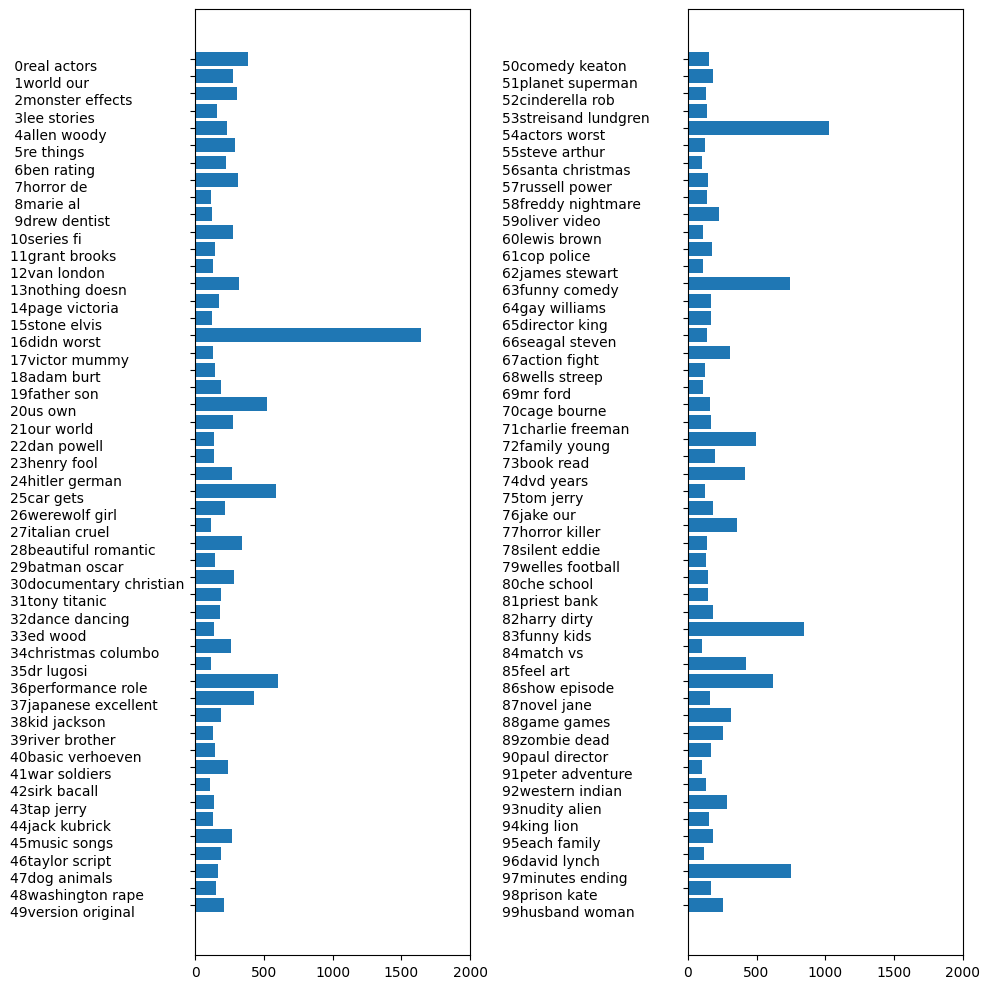

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad = 130)
plt.tight_layout()

# Примеры из лекции №12

### Пример применения: анализ тональности киноотзывов

In [13]:
print("Тип text_train: {}".format(type(text_train)))
print("Длина text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

Тип text_train: <class 'list'>
Длина text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" shoul

In [14]:
np.unique(y_train)

array([0, 1])

In [15]:
print("Количество примеров на класс (обучение - training): {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение - training): [12500 12500]


In [16]:
print("Количество документов в текстовых данных: {}".format(len(text_test)))
print("Количество примеров на класс (тест - test): {}".format(np.bincount(y_test)))

Количество документов в текстовых данных: 25000
Количество примеров на класс (тест - test): [12500 12500]


### Применение метода «мешка слов» к синтетическому набору данных

In [17]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [19]:
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря:\n {}".format(vect.vocabulary_))

Размер словаря: 13
Содержимое словаря:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [20]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [21]:
print("Плотное представление bag_of_words:\n{}".format(bag_of_words.toarray()))

Плотное представление bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Модель «мешка слов» для набора данных киноотзывов

In [22]:
# сверху есть код, где создавал text_train и text_test
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [23]:
feature_names = vect.get_feature_names_out()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20 признаков:\n{}".format(feature_names[:20]))
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print("Каждый 2000-й признак:\n{}".format(feature_names[::2000]))

Количество признаков: 74849
Первые 20 признаков:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
Признаки с 20010 по 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
Каждый 2000-й признак:
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Средняя правильность перекрестной проверки: {:.2f}".format(np.mean(scores)))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Средняя правильность перекрестной проверки: 0.88


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры: {}".format(grid.best_params_))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Наилучшее значение перекрестной проверки: 0.89
Наилучшие параметры: {'C': 0.1}


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X_test = vect.transform(text_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.88


In [27]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train c min_df: {}".format(repr(X_train)))

X_train c min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [28]:
feature_names = vect.get_feature_names_out()
print("Первые 50 признаков:\n{}".format(feature_names[:50]))
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print("Каждый 700-й признак:\n{}".format(feature_names[::700]))

Первые 50 признаков:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Признаки с 20010 по 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Каждый 700-й признак:
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrustin

In [29]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Наилучшее значение перекрестной проверки: 0.89


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Стоп - слова

In [31]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Количество стоп-слов: {}".format(len(ENGLISH_STOP_WORDS)))
print("Каждое 10-е стоп-слово:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп-слов: 318
Каждое 10-е стоп-слово:
['so', 'whither', 'becomes', 'thick', 'himself', 'among', 'no', 'thru', 'your', 'they', 'un', 'eg', 'con', 'whereafter', 'see', 'other', 'our', 'elsewhere', 'eleven', 'once', 'latter', 'somewhere', 'keep', 'few', 'such', 'due', 'indeed', 'has', 'you', 'should', 'toward', 'still']


In [32]:
# Настройка stop_words="english" задает встроенный список стоп-слов.
# Мы можем также расширить его и передать свой собственный.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов:\n{}".format(repr(X_train)))

X_train с использованием стоп-слов:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [33]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Наилучшее значение перекрестной проверки: 0.88


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Масштабирование данных с помощью tf-idf

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression(max_iter=100))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Наилучшее значение перекрестной проверки: 0.89


In [37]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# Преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)
# Находим максимальное значение каждого признака по набору данных
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков feature_names = np.array(vectorizer.get_feature_names())
print("Признаки с наименьшими значениями tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Признаки с наибольшими значениями tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [38]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями tfidf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями tfidf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


### Исследование коэффициентов модели

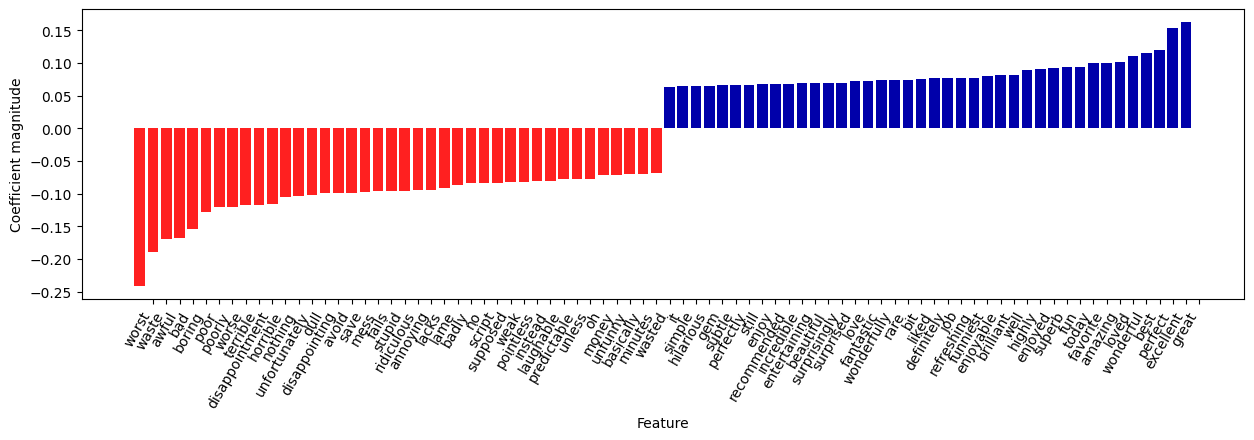

In [39]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_, feature_names, n_top_features=40)

### Модель «мешка слов» для последовательностей из нескольких слов (n-грамм)

In [40]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [41]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names_out()))

Размер словаря: 13
Словарь:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [42]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names_out()))

Размер словаря: 14
Словарь:
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [43]:
print("Преобразованные данные (плотность):\n{}".format(cv.transform(bards_words).toarray()))

Преобразованные данные (плотность):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [44]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names_out()))

Размер словаря: 39
Словарь:
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [45]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: Only length-1 arrays can be converted to Python scalars

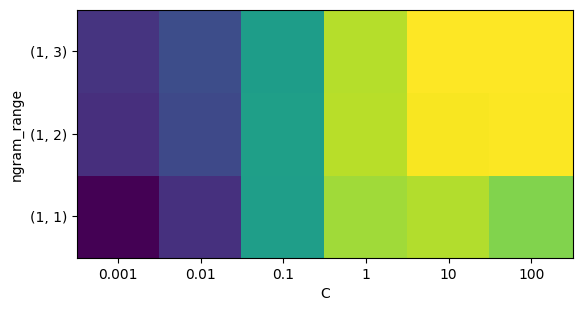

In [53]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f", xticklabels=param_grid['logisticregression__C'],yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22.0, 22.0)

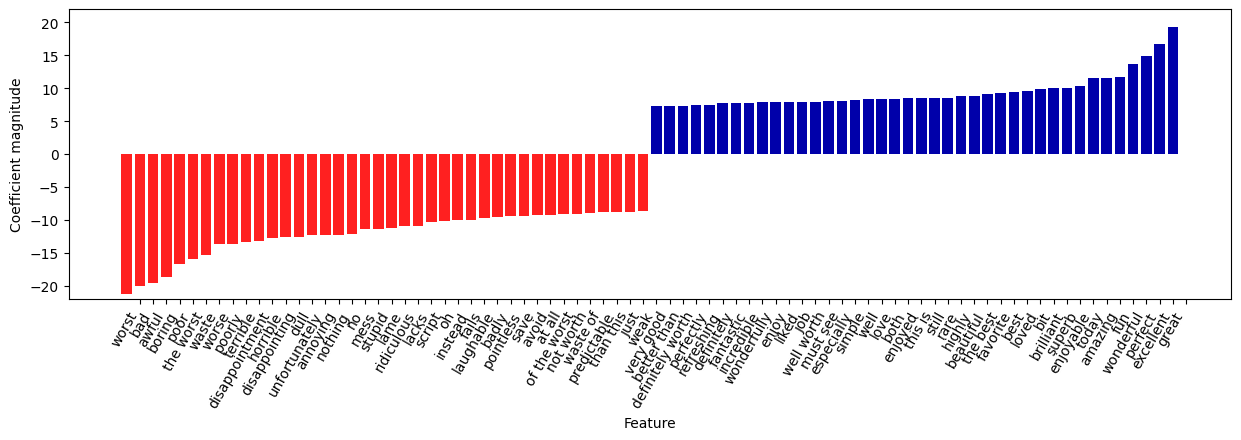

In [51]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

(-22.0, 22.0)

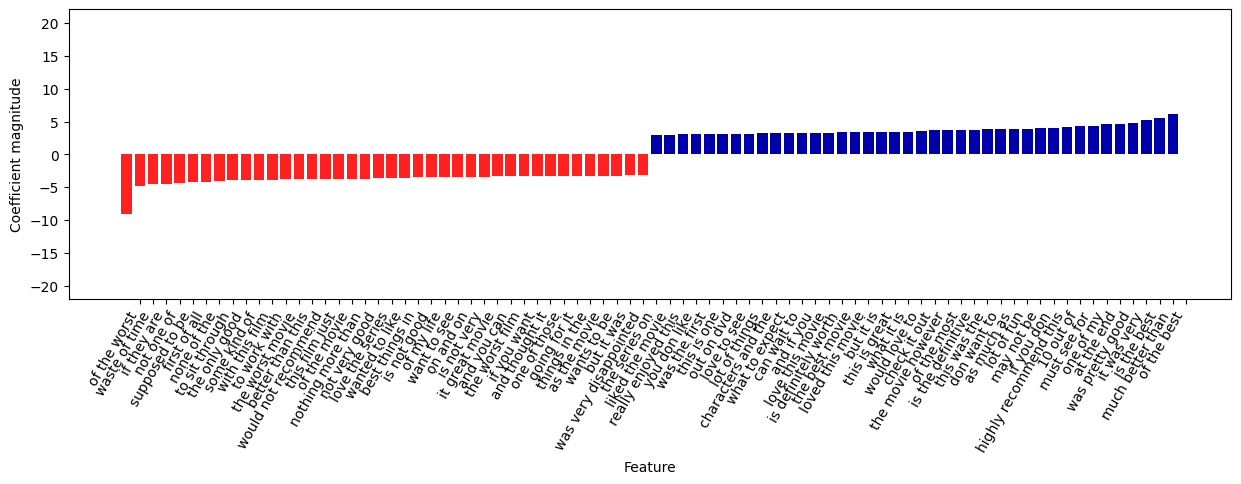

In [54]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

# Создание своего «мешка слов», например, набор из 20-25 отзывов о чем-либо

Я написал отзывы на английском языке про магазин велосипедов. 6 позитивных и 6 негативных отзывов для обучающего набора. А для тестового набора тоже самое. В итоге у меня 24 отзывов.

### Создание "мешок слов"

In [55]:
from sklearn.datasets import load_files
reviews_train = load_files("my_example/train")

# load_files возвращает коллекцию, содержащую обучающие тексты и обучающие метки
text_train, y_train = reviews_train.data, reviews_train.target

In [56]:
print("Тип text_train: {}".format(type(text_train)))
print("Длина text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

Тип text_train: <class 'list'>
Длина text_train: 12
text_train[1]:
b'Quick and Easy Financing - The financing options at this store made it easy for me to afford the bike of my dreams. The process was straightforward, and the staff helped me find a plan that fit my budget.'


In [59]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [60]:
print("text_train[1]:\n{}".format(text_train[1]))

text_train[1]:
b'Quick and Easy Financing - The financing options at this store made it easy for me to afford the bike of my dreams. The process was straightforward, and the staff helped me find a plan that fit my budget.'


In [61]:
np.unique(y_train)

array([0, 1])

In [62]:
print("Количество примеров на класс (обучение - training): {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение - training): [6 6]


In [63]:
reviews_test = load_files("my_example/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
print("Количество документов в текстовых данных: {}".format(len(text_test)))
print("Количество примеров на класс (тест - test): {}".format(np.bincount(y_test)))

Количество документов в текстовых данных: 12
Количество примеров на класс (тест - test): [6 6]


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)

In [65]:
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря:\n {}".format(vect.vocabulary_))

Размер словаря: 199
Содержимое словаря:
 {'great': 68, 'selection': 144, 'and': 6, 'service': 145, 'recently': 134, 'purchased': 127, 'mountain': 103, 'bike': 17, 'from': 63, 'this': 165, 'store': 154, 'couldn': 29, 'be': 12, 'happier': 71, 'the': 161, 'staff': 153, 'was': 186, 'knowledgeable': 83, 'helped': 73, 'me': 98, 'find': 57, 'perfect': 116, 'fit': 58, 'variety': 181, 'of': 109, 'bikes': 18, 'they': 164, 'offer': 110, 'is': 81, 'impressive': 77, 'quick': 130, 'easy': 43, 'financing': 56, 'options': 114, 'at': 10, 'made': 94, 'it': 82, 'for': 59, 'to': 169, 'afford': 4, 'my': 105, 'dreams': 40, 'process': 123, 'straightforward': 155, 'plan': 118, 'that': 160, 'budget': 21, 'limited': 87, 'customization': 31, 'if': 76, 'you': 197, 're': 131, 'looking': 90, 'customize': 32, 'your': 198, 'may': 97, 'not': 107, 'best': 14, 'place': 117, 'wasn': 187, 'very': 183, 'helpful': 74, 'in': 78, 'guiding': 69, 'through': 166, 'friendly': 61, 'atmosphere': 11, 'only': 113, 'do': 39, 'have': 7

In [67]:
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<12x199 sparse matrix of type '<class 'numpy.int64'>'
	with 333 stored elements in Compressed Sparse Row format>


In [68]:
print("Плотное представление X_train:\n{}".format(X_train.toarray()))

Плотное представление X_train:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [69]:
feature_names = vect.get_feature_names_out()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20 признаков:\n{}".format(feature_names[:20]))
print("Признаки с 100 по 120:\n{}".format(feature_names[100:120]))
print("Каждый 50-й признак:\n{}".format(feature_names[::50]))

Количество признаков: 199
Первые 20 признаков:
['about' 'above' 'accessories' 'advertised' 'afford' 'after' 'and' 'apart'
 'are' 'asking' 'at' 'atmosphere' 'be' 'being' 'best' 'better' 'beyond'
 'bike' 'bikes' 'bought']
Признаки с 100 по 120:
['member' 'misleading' 'more' 'mountain' 'much' 'my' 'needs' 'not' 'notch'
 'of' 'offer' 'offered' 'online' 'only' 'options' 'overall' 'perfect'
 'place' 'plan' 'poor']
Каждый 50-й признак:
['about' 'explain' 'member' 'simple']


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Средняя правильность перекрестной проверки: {:.2f}".format(np.mean(scores)))

Средняя правильность перекрестной проверки: 0.57


In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры: {}".format(grid.best_params_))

Наилучшее значение перекрестной проверки: 0.57
Наилучшие параметры: {'C': 1}


In [72]:
X_test = vect.transform(text_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.67


In [84]:
vect = CountVectorizer(min_df=2).fit(text_train)
X_train = vect.transform(text_train)
print("X_train c min_df: {}".format(repr(X_train)))

X_train c min_df: <12x51 sparse matrix of type '<class 'numpy.int64'>'
	with 185 stored elements in Compressed Sparse Row format>


In [85]:
feature_names = vect.get_feature_names_out()
print("Первые 10 признаков:\n{}".format(feature_names[:10]))
print("Признаки с 30 по 40:\n{}".format(feature_names[30:40]))
print("Каждый 10-й признак:\n{}".format(feature_names[::10]))

Первые 10 признаков:
['about' 'accessories' 'and' 'at' 'atmosphere' 'be' 'better' 'bike'
 'bought' 'brought']
Признаки с 30 по 40:
['pricing' 'process' 'purchase' 'purchased' 'quality' 'quick' 'repairs'
 'same' 'selection' 'service']
Каждый 10-й признак:
['about' 'customer' 'in' 'pricing' 'shop' 'with']


In [86]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.47


### Создание словаря стоп-слов, применим стоп-слова к своему «мешку слов»

In [87]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Количество стоп-слов: {}".format(len(ENGLISH_STOP_WORDS)))

Количество стоп-слов: 318


In [92]:
# Настройка stop_words="english" задает встроенный список стоп-слов.
# Мы можем также расширить его и передать свой собственный.
vect = CountVectorizer(min_df=2, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов:\n{}".format(repr(X_train)))

X_train с использованием стоп-слов:
<12x27 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in Compressed Sparse Row format>


In [93]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.23


### Масштабирование данных с помощью tf-idf

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=2, norm=None), LogisticRegression(max_iter=100))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.60


In [95]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# Преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)
# Находим максимальное значение каждого признака по набору данных
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков feature_names = np.array(vectorizer.get_feature_names())
print("Признаки с наименьшими значениями tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['store' 'of' 'this' 'staff' 'in' 'it' 'selection' 'made' 'from' 'left'
 'helped' 'process' 'purchase' 'purchased' 'quick' 'same' 'not' 'pricing'
 'shop' 'great']
Признаки с наибольшими значениями tfidf:
['better' 'bike' 'to' 'my' 'was' 'for' 'and' 'they' 'is' 'me' 'be'
 'service' 'the' 'about' 'accessories' 'quality' 'options' 'atmosphere'
 'repairs' 'with']


In [96]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями tfidf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями tfidf:
['and' 'the' 'bike' 'store' 'to' 'of' 'my' 'staff' 'this' 'for' 'was'
 'they' 'is' 'it' 'me' 'service' 'be' 'in' 'made' 'selection' 'about'
 'from' 'accessories' 'had' 'up' 'took' 'at' 'atmosphere' 'better'
 'bought' 'brought' 'shop' 'customer' 'experience' 'same' 'repairs'
 'quick' 'quality' 'purchased' 'purchase' 'process' 'pricing' 'options'
 'felt' 'not' 'find' 'fit' 'left' 'great' 'helped' 'with']


### Исследование коэффициентов модели

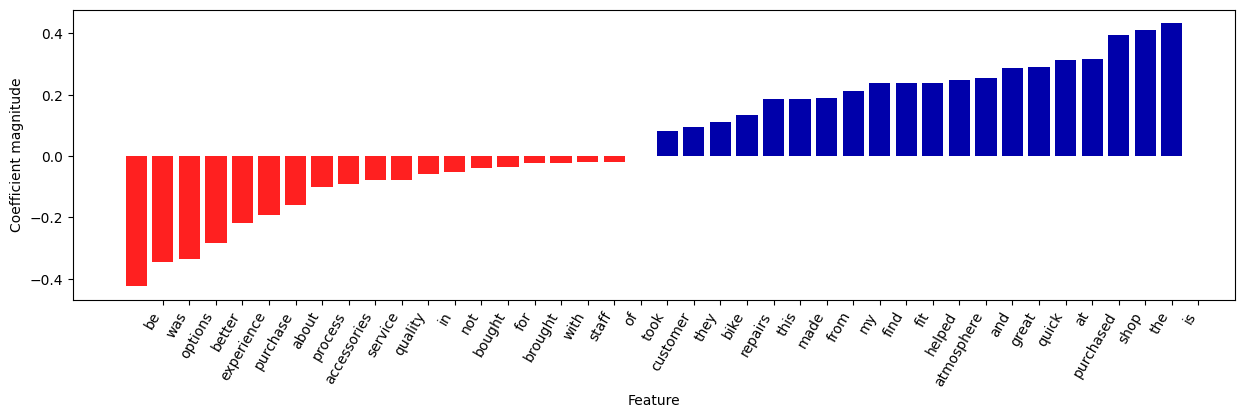

In [98]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_, feature_names, n_top_features=20)

### Выводы по работе

В итоге при создании "мешка слов" из моих отзывов на английском языке о магазине велосипедов получилось 199 признаков, то есть токенов.

Наилучшее значение перекрестной проверки получилось 57%. Я думаю, для такого количества отзывов нормально.

Когда я поставил значение для параметра min_df = 2, то значение проверки ухудшилось и вышло 47%. А количество признаков уменьшился с 199 на 51 признаков.

При применении стоп-слов на английском языке количество признаков опять уменьшились на 27 признаков. И наилучшее значение перекрестной проверки уменьшилось до 23%.

При масштабировании данных с помощью tf-idf помогло и наилучшее значение перекрестной проверки улучшилось до 60%.

Можно сделать вывод, что при уменьшении признаков падает значение проверки перектрестной проверки.